In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("CarPrice_Assignment.csv")
print(data.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [3]:
data=data.drop(['car_ID','CarName'],axis=1)
data=pd.get_dummies(data,drop_first=True)
print(data.head())

   symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0          3       88.6      168.8      64.1       48.8        2548   
1          3       88.6      168.8      64.1       48.8        2548   
2          1       94.5      171.2      65.5       52.4        2823   
3          2       99.8      176.6      66.2       54.3        2337   
4          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  ...  cylindernumber_three  \
0         130       3.47    2.68               9.0  ...                     0   
1         130       3.47    2.68               9.0  ...                     0   
2         152       2.68    3.47               9.0  ...                     0   
3         109       3.19    3.40              10.0  ...                     0   
4         136       3.19    3.40               8.0  ...                     0   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                    

In [4]:
x=data.drop('price',axis=1)
y=data['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [6]:
print("Name:Lakshiya Rajkumar ")
print("Reg. No:212225240076")
print("\n=== Cross-Validation ===")
cv_scores=cross_val_score(model,x,y,cv=5)
print("Fold R^2 scores:",[f"{score:.4f}"for score in cv_scores])
print("Average R^2: {cv_scores.mean():.4f}")

Name:Lakshiya Rajkumar 
Reg. No:212225240076

=== Cross-Validation ===
Fold R^2 scores: ['0.6238', '0.6316', '0.3132', '0.3643', '-0.4944']
Average R^2: {cv_scores.mean():.4f}


In [9]:
y_pred=model.predict(x_test)
print("\n=== Test Set Performance ===")
print(f"MSE: {mean_squared_error(y_test,y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test,y_pred):.2f}")
print(f"R^2: {r2_score(y_test,y_pred):.4f}")


=== Test Set Performance ===
MSE: 8482008.48
MAE: 2089.38
R^2: 0.8926


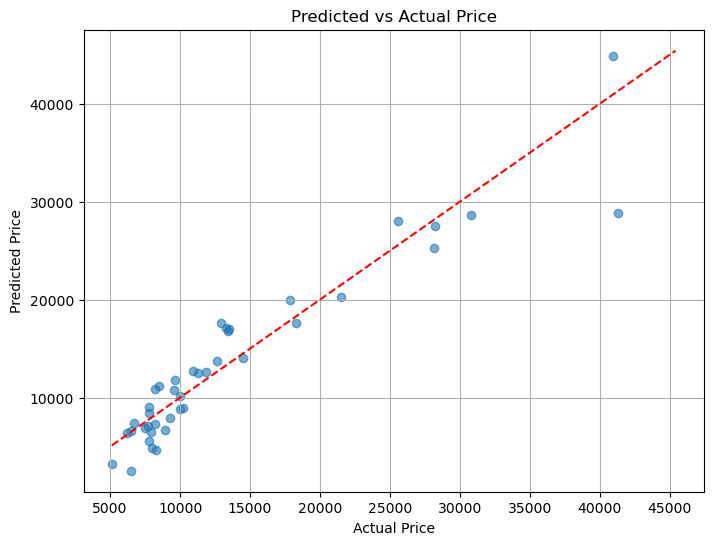

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.6)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Price")
plt.grid(True)
plt.show()
